<ipython-input-3-93a83777853c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_PRCP_Ridge'] = predictions_ridge


Linear Regression with Standardization and Ridge Regularization - MSE: 5.331924572302458, R-squared: 0.2727135381707686


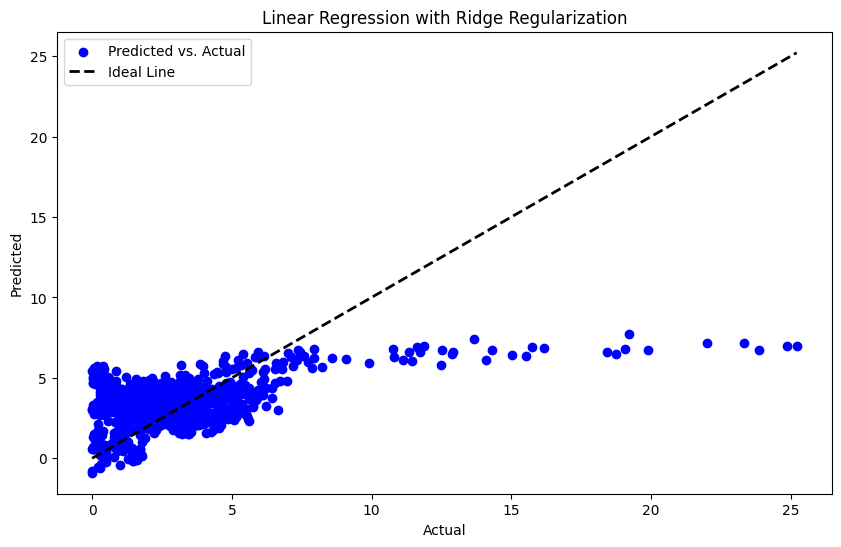

<ipython-input-3-93a83777853c>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_PRCP_RF_More_Estimators'] = predictions_rf_more_estimators


Random Forest with More Estimators - MSE: 1.8054119179471242, R-squared: 0.7537377680155213


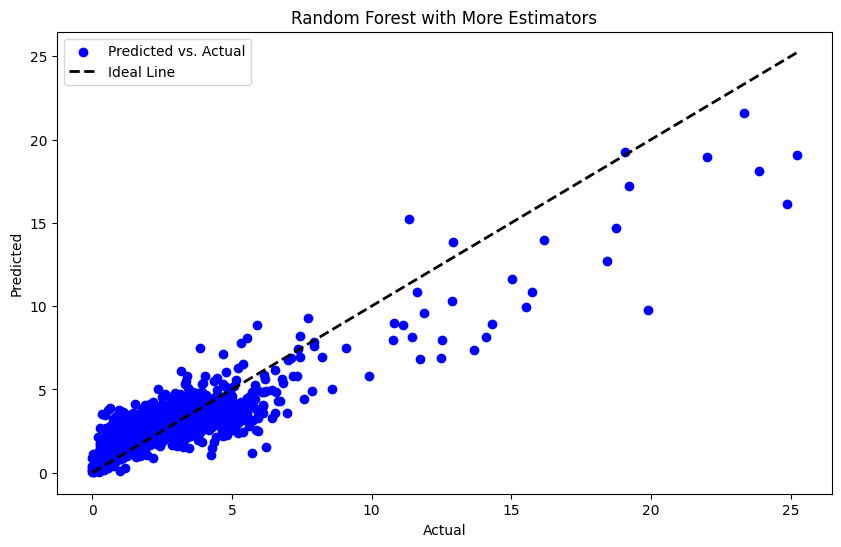

<ipython-input-3-93a83777853c>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_PRCP_RF_Diff_Depth'] = predictions_rf_diff_depth


Random Forest with Different Max Depth - MSE: 2.5972692960978128, R-squared: 0.6457266468867212


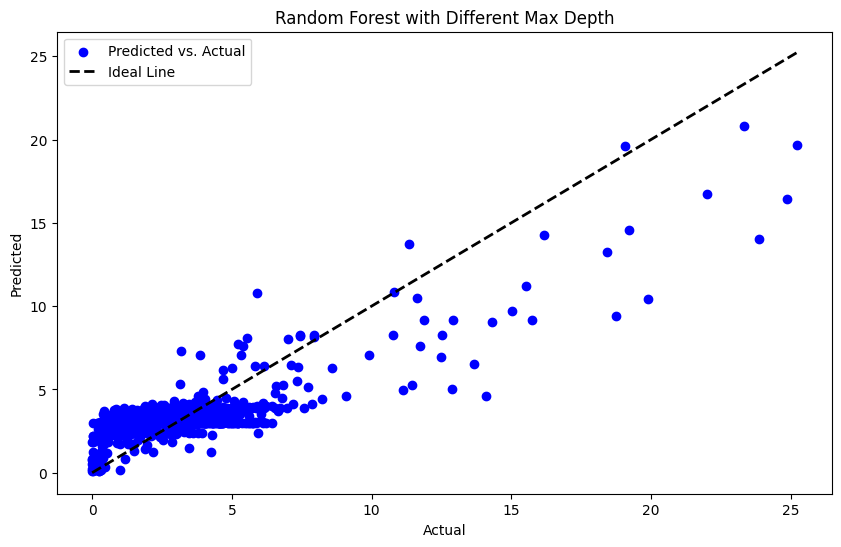

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

# Parameters
file_path = '/content/Combined dataset_nonsort 2 .xlsx'
target_variable = 'PRCP'  # Target variable

# Read the Excel file
data = pd.read_excel(file_path)

# Convert columns to numeric, handle non-numeric values
columns_to_convert = ['AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Data Preprocessing
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
data['DATE'] = pd.to_datetime(data['DATE'])

# Feature Engineering
lag_period = 1
columns_to_average = ['AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN']
for col in columns_to_average:
    data[f'{col}_lag{lag_period}'] = data[col].shift(lag_period)
    data[f'{col}_Moving_Avg'] = data[col].rolling(window=5, min_periods=1).mean()

# Data Splitting
train_data = data[(data['DATE'].dt.year >= 2015) & (data['DATE'].dt.year <= 2020)]
test_data = data[(data['DATE'].dt.year >= 2021) & (data['DATE'].dt.year <= 2023)]

# Model Training and Evaluation Function
def train_and_evaluate_model(model, train_data, test_data, features, target):
    model.fit(train_data[features], train_data[target])
    predictions = model.predict(test_data[features])
    mse = mean_squared_error(test_data[target], predictions)
    r2 = r2_score(test_data[target], predictions)
    return model, predictions, mse, r2

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(test_data, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(test_data[target], predictions, color='blue', label='Predicted vs. Actual')
    plt.plot([test_data[target].min(), test_data[target].max()], [test_data[target].min(), test_data[target].max()], 'k--', lw=2, label='Ideal Line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

# Specify features and target
features = [col for col in data.columns if col.startswith(('AWND', 'TAVG', 'TMAX', 'TMIN')) and 'Moving_Avg' in col]
target = target_variable + '_Moving_Avg'


# Variation 1 Modified: Linear Regression with Standardization and Ridge Regularization
lr_pipeline_ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
lr_model_ridge, predictions_ridge, mse_ridge, r2_ridge = train_and_evaluate_model(lr_pipeline_ridge, train_data, test_data, features, target)
test_data['predicted_PRCP_Ridge'] = predictions_ridge
print(f"Linear Regression with Standardization and Ridge Regularization - MSE: {mse_ridge}, R-squared: {r2_ridge}")
plot_actual_vs_predicted(test_data, predictions_ridge, 'Linear Regression with Ridge Regularization')


# Variation 2: Random Forest with More Estimators
rf_model_more_estimators = RandomForestRegressor(n_estimators=100)
rf_model_more_estimators, predictions_rf_more_estimators, mse_rf_more_estimators, r2_rf_more_estimators = train_and_evaluate_model(rf_model_more_estimators, train_data, test_data, features, target)
test_data['predicted_PRCP_RF_More_Estimators'] = predictions_rf_more_estimators
print(f"Random Forest with More Estimators - MSE: {mse_rf_more_estimators}, R-squared: {r2_rf_more_estimators}")
plot_actual_vs_predicted(test_data, predictions_rf_more_estimators, 'Random Forest with More Estimators')

# Variation 3: Random Forest with Different Max Depth
rf_model_diff_depth = RandomForestRegressor(max_depth=5)
rf_model_diff_depth, predictions_rf_diff_depth, mse_rf_diff_depth, r2_rf_diff_depth = train_and_evaluate_model(rf_model_diff_depth, train_data, test_data, features, target)
test_data['predicted_PRCP_RF_Diff_Depth'] = predictions_rf_diff_depth
print(f"Random Forest with Different Max Depth - MSE: {mse_rf_diff_depth}, R-squared: {r2_rf_diff_depth}")
plot_actual_vs_predicted(test_data, predictions_rf_diff_depth, 'Random Forest with Different Max Depth')



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Dummy data loading function
def load_data(variation):
    # This function should be modified to load your specific dataset variations
    # For demonstration, I'm creating a simple synthetic dataset
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
    return train_test_split(X, y, test_size=0.3, random_state=42)

# Load data for variation 2
X_train_2, X_test_2, y_train_2, y_test_2 = load_data(variation=2)

# Define XGBoost model for variation 2
model_2 = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, n_estimators=100, max_depth=4, seed=42)
model_2.fit(X_train_2, y_train_2)

# Predict and evaluate for variation 2
predictions_2 = model_2.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, predictions_2)
print(f"Accuracy for Variation 2: {accuracy_2}")

# Load data for variation 3
X_train_3, X_test_3, y_train_3, y_test_3 = load_data(variation=3)

# Define XGBoost model for variation 3 with different parameters
model_3 = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.05, n_estimators=150, max_depth=6, seed=42)
model_3.fit(X_train_3, y_train_3)

# Predict and evaluate for variation 3
predictions_3 = model_3.predict(X_test_3)
accuracy_3 = accuracy_score(y_test_3, predictions_3)
print(f"Accuracy for Variation 3: {accuracy_3}")


Accuracy for Variation 2: 0.91
Accuracy for Variation 3: 0.9133333333333333


In [ ]:
print(test_data)

          STATION                                        NAME  LATITUDE  \
132   USW00014835  LAFAYETTE PURDUE UNIVERSITY AIRPORT, IN US  40.41236   
133   USW00014835  LAFAYETTE PURDUE UNIVERSITY AIRPORT, IN US  40.41236   
134   USW00014835  LAFAYETTE PURDUE UNIVERSITY AIRPORT, IN US  40.41236   
135   USW00014835  LAFAYETTE PURDUE UNIVERSITY AIRPORT, IN US  40.41236   
136   USW00014835  LAFAYETTE PURDUE UNIVERSITY AIRPORT, IN US  40.41236   
...           ...                                         ...       ...   
4985  USS0021C28S                      WHITE PASS E.S., WA US  46.64000   
4986  USS0021C28S                      WHITE PASS E.S., WA US  46.64000   
4987  USS0021C28S                      WHITE PASS E.S., WA US  46.64000   
4988  USS0021C28S                      WHITE PASS E.S., WA US  46.64000   
4989  USS0021C28S                      WHITE PASS E.S., WA US  46.64000   

      LONGITUDE  ELEVATION       DATE  AWND  PRCP   TAVG  TMAX  ...  \
132   -86.94739      181.7 2